# Training A2C with Vector Envs and Domain Randomization

In this tutorial, you’ll learn how to use vectorized environments to train an Advantage Actor-Critic agent. We are going to use A2C, which is the synchronous version of the A3C algorithm [1].

Vectorized environments [3] can help to achieve quicker and more robust training by allowing multiple instances of the same environment to run in parallel (on multiple CPUs). This can significantly reduce the variance and thus speeds up the training.

We will implement an Advantage Actor-Critic from scratch to look at how you can feed batched states into your networks to get a vector of actions (one action per environment) and calculate the losses for actor and critic on minibatches of transitions. Each minibatch contains the transitions of one sampling phase: n_steps_per_update steps are executed in n_envs environments in parallel (multiply the two to get the number of transitions in a minibatch). After each sampling phase, the losses are calculated and one gradient step is executed. To calculate the advantages, we are going to use the Generalized Advantage Estimation (GAE) method [2], which balances the tradeoff between variance and bias of the advantage estimates.

The A2C agent class is initialized with the number of features of the input state, the number of actions the agent can take, the learning rates and the number of environments that run in parallel to collect experiences. The actor and critic networks are defined and their respective optimizers are initialized. The forward pass of the networks takes in a batched vector of states and returns a tensor of state values and a tensor of action logits. The select_action method returns a tuple of the chosen actions, the log-probs of those actions, and the state values for each action. In addition, it also returns the entropy of the policy distribution, which is subtracted from the loss later (with a weighting factor ent_coef) to encourage exploration.

The get_losses function calculates the losses for the actor and critic networks (using GAE), which are then updated using the update_parameters function.

In [1]:
from settings import Settings

settings = Settings()
settings.randomize_domain = True
settings.save_weights = True
settings.load_weights = False

### Training the A2C Agent

For our training loop, we are using the RecordEpisodeStatistics wrapper to record the episode lengths and returns and we are also saving the losses and entropies to plot them after the agent finished training.

You may notice that the don’t reset the vectorized envs at the start of each episode like we would usually do. This is because each environment resets automatically once the episode finishes (each environment takes a different number of timesteps to finish an episode because of the random seeds). As a result, we are also not collecting data in episodes, but rather just play a certain number of steps (n_steps_per_update) in each environment (as an example, this could mean that we play 20 timesteps to finish an episode and then use the rest of the timesteps to begin a new one).


In [2]:
from train import train
train_result = train(settings=settings)

100%|██████████| 1000/1000 [08:34<00:00,  1.94it/s]


### Plotting

Plot the results.

In [3]:
# %matplotlib inline

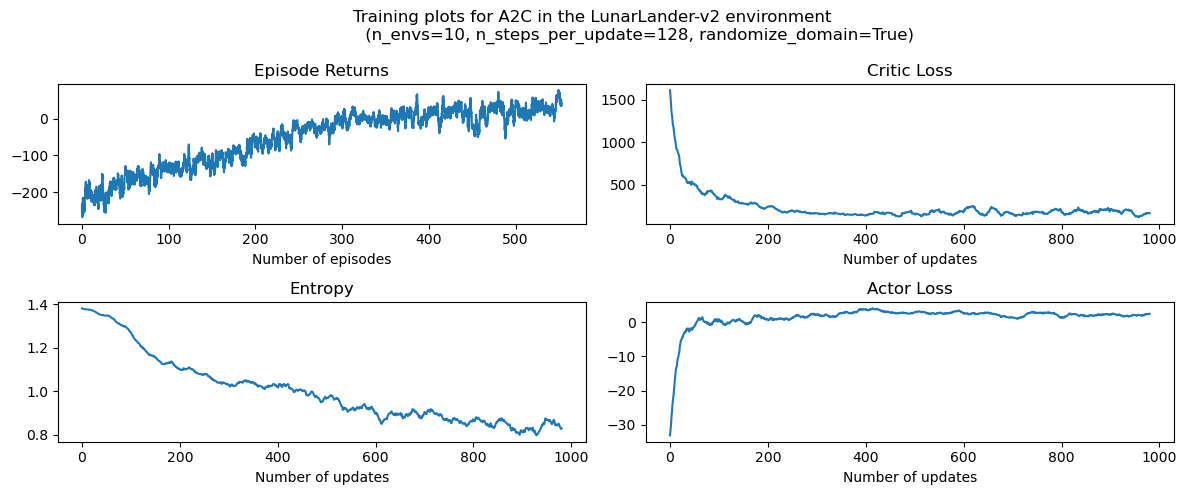

In [4]:
from plot import plot
plot(train_result=train_result)